# Prétraitement des données de consommation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [3]:
PV_data_path = os.path.join("Building/", "household_15min-1day.csv")    
PVpu_raw_wtr = pd.read_csv(PV_data_path, index_col=0, parse_dates=True)

## Visualisation des données de la résidence 1 (cummulé)

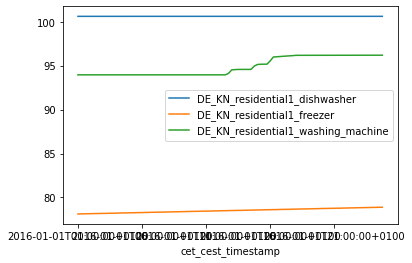

In [12]:
ax = plt.gca()
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_dishwasher', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_freezer', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_heat_pump', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_washing_machine', ax=ax)

plt.show()

## Visualisation des données de la résidence 1 (diff)

In [19]:
PVpu_raw_wtr['DE_KN_residential1_freezer_inst']= PVpu_raw_wtr['DE_KN_residential1_freezer'].diff()
PVpu_raw_wtr['DE_KN_residential1_dishwasher_inst']= PVpu_raw_wtr['DE_KN_residential1_dishwasher'].diff()
PVpu_raw_wtr['DE_KN_residential1_heat_pump_inst']= PVpu_raw_wtr['DE_KN_residential1_heat_pump'].diff()
PVpu_raw_wtr['DE_KN_residential1_washing_machine_inst']= PVpu_raw_wtr['DE_KN_residential1_washing_machine'].diff()
PVpu_raw_wtr['DE_KN_residential1_total_load_inst']= PVpu_raw_wtr['DE_KN_residential1_freezer_inst'] + PVpu_raw_wtr['DE_KN_residential1_dishwasher_inst'] + PVpu_raw_wtr['DE_KN_residential1_heat_pump_inst'] + PVpu_raw_wtr['DE_KN_residential1_washing_machine_inst']
PVpu_raw_wtr['DE_KN_residential1_pv_inst']= PVpu_raw_wtr['DE_KN_residential1_pv'].diff()
PVpu_raw_wtr['DE_KN_residential1_grid_import_inst']= PVpu_raw_wtr['DE_KN_residential1_grid_import'].diff()

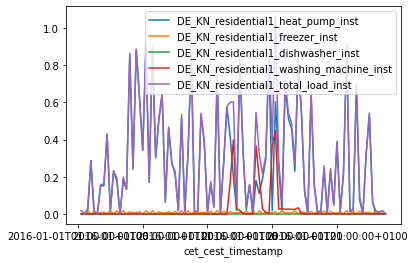

In [20]:
ax = plt.gca()
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_heat_pump_inst', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_freezer_inst', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_dishwasher_inst', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_washing_machine_inst', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_total_load_inst', ax=ax)

plt.show()

## Comparaison de la production et de la consomation

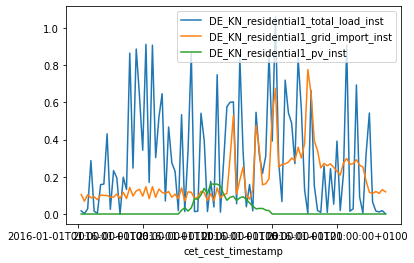

In [21]:
ax = plt.gca()

PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_total_load_inst', ax=ax)
PVpu_raw_wtr.plot(kind='line', x='cet_cest_timestamp', y='DE_KN_residential1_grid_import_inst', ax=ax)
PVpu_raw_wtr.plot(kind='line',x='cet_cest_timestamp',  y='DE_KN_residential1_pv_inst', ax=ax)

plt.show()

Note: la consommation total du foyer ne semble pas correspondre à la somme de l'énergie importé et de la production PV

In [23]:
augmented_households_data = os.path.join("Building/", "households_augmented_15min_1day.csv")    
PVpu_raw_wtr.to_csv(augmented_households_data)